# Assignment 1 


In [1]:
import torch

## Task 1
### Problem 1
X is uniformly distributed in $C^1$
$$C^1=\{x∈R^p |‖x‖_∞≤1/2\}$$
$$Pr⁡(X∈C_d )=q$$
when $d<1$
$$Pr⁡(X∈C_d )=d^p=q$$
when $d≥1$
X must be distributed in C_d
$$Pr⁡(X∈C_d )=1=q$$

### Problem 2
because $Pr⁡(|X^1|_∞≤2.576)=0.99$ and the components of $X^p$ is independent

when all components lie inside of the interval [-2.576,2.576]

the probability is $0.99^p$

so $$Pr⁡(‖X^p‖_∞＞2.576)=1-0.99^p$$
when p=2$$Pr⁡(‖X^2‖_∞＞2.576)=0.0199$$
when p=3$$Pr⁡(‖X^3‖_∞＞2.576)=0.029701$$
when p=500$$Pr⁡(‖X^{500}‖_∞＞2.576)=0.99343$$


## Task 2

In [30]:
import numpy as np
import math
from matplotlib import pyplot as plt

## generate 100 uniformly distributed random vectors between -1 and 1 with 2 dimensions
Samples = np.random.uniform(-1,1,size=(100,2))

In [2]:
#compute the inneproduct between each two random vectors, including innenproduct between each vector and itself, which are on the diadonal of matrix Innenproduct
InnerProduct = np.dot(Samples,Samples.T)
print(Samples.shape)
print(InnerProduct.shape)

(100, 2)
(100, 100)


In [3]:
#compute the norm of each random vector
Norm = np.linalg.norm(Samples,axis=1)
Norm = Norm[:,None]

In [4]:
#the Norm_Matrix consisit of the multiplication result between the norm of every two random vectors,including suqared norm each vector, which are on the diadonal of matrix Innenproduct
Norm_Matrix = np.dot(Norm,Norm.T) 

In [5]:
#according to the given formula, the cosine of angular between two vecotrs equals Innenproduct over the norm of two vectors 
#the diagonal of matrix Cosine is the angular between each vector and itself, which should be excluded by filling the diagonal with -1, which indicates the biggest possible angular (180 Degree) 
Cosine = InnerProduct/Norm_Matrix
np.fill_diagonal(Cosine, -1)
print(Cosine.shape)

(100, 100)


In [6]:
#finde the biggest Cosine of each row, which indicates the smallest angular between the vector and all other random vectors
maxCosine = np.amax(Cosine,axis=1)

In [7]:
#use arccos to find the corresponding minimal angular
minAngular = np.arccos(maxCosine)

In [19]:
# calculate the mean of all minimal angulars,convert radian into degree and print the output 
MinAngularRadian = np.mean(minAngular)
MinAngularDegree = math.degrees(MinAngularRadian)
print('the minimum angle to all other vectors is {} Degree'.format(MinAngularDegree))

the minimum angle to all other vectors is 1.829005692581908 Degree


- Repeat the above for dimensions $d = 1,...,1000$ and use the results to plot the average minimum angle against the dimension.

In [15]:
#define function getminAngular, input parameter: d dimension of random vectors, output: the minimal angular 
def getminAngular (d):
    Samples = np.random.uniform(-1,1,size=(100,d))
    InnerProduct = np.dot(Samples,Samples.T)
    #Modulus = np.sqrt(np.sum(Samples**2,axis=1))
    Norm = np.linalg.norm(Samples,axis=1)
    Norm = Norm[:,None]
    Norm_Matrix = np.dot(Norm,Norm.T)
    Cosine = InnerProduct/Norm_Matrix
    np.fill_diagonal(Cosine, -1)
    maxCosine = np.amax(Cosine,axis=1)
    minAngular = np.arccos(maxCosine)
    MinAngularRadian = np.mean(minAngular)
    MinAngularDegree = math.degrees(MinAngularRadian)
    return MinAngularDegree

In [16]:
p = np.arange(1,1001)
result = np.zeros(1000)
for i in range(1,1001):
     result[i-1] = getminAngular(i)

Text(0.5, 1.0, 'minimal angular against dimension')

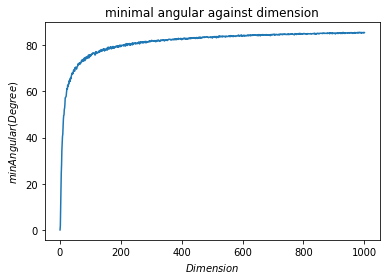

In [17]:
plt.plot(p,result)
plt.xlabel('$Dimension$')
plt.ylabel('$minAngular(Degree)$')
plt.title('minimal angular against dimension')

### Conclusion
- With the increase of dimension, the average minimal angle increases to almost 90 Degree. When dimension is 100000, the minimal angular is almost 90 Degree, which indicates that in high dimensional space 2 randomly sampled vectors are orthogonal to each other.
- With the increase of dimension, the increase speed of minimal angular becomes samller.  

In [24]:
getminAngular (100000)

89.53910018078128

The result does not change if the sample size increases

## Task 3
### Problem 1

yes. The sum of the probabilities is$$0.4+0.14+0.05+0.02+0.26+0.13=1$$

so it is a probability table.

### Problem 2
$$E_{Y|X=2}[Y] = \sum\limits_{i=1}^{3} i \cdot P(Y=i|X=2)= 1 \times \frac{0.4}{0.4+0.14+0.05} + 2 \times \frac{0.14}{0.4+0.14+0.05} + 3 \times \frac{0.05}{0.4+0.14+0.05} = 1.407$$
$$E_(X=1|Y=3) = \frac{0.13}{0.13+0.05}=0.7222$$

### Problem 3
p(x,y)≥0

$$∫_{-∞}^∞∫_{-∞}^∞p(x,y)dxdy=∫_0^1dx∫_0^{1/2}dy=0.5$$

It is not a joint density function for two random variables.

### Problem 4
$$f_X(x)=∫_{-∞}^∞p(x,y)dy=∫_x^∞2e^{-(x+y)}dy=2e^{-2x}$$ 
$$f_Y(y)=∫_{-∞}^∞p(x,y)dx=∫_0^y2e^{-(x+y)}dx= 2e^{-y}(1-e^{-y})$$

### Problem 5
- marginal density function for y 
<br> $p(y) = \int_0^3 \frac{1}{15}(2x+4y) dx = \frac{1}{5}(3+4y)$
- Conditional Probability density function (x under condition y)
<br> $p(x|y) = \frac{p(x,y)}{p(y)} = \frac{\frac{1}{15}(2x+4y)}{\frac{1}{5}(3+4y)}=\frac{1}{3} \cdot \frac{2x+4y}{3+4y}$
<br>$P(X \leq 2|Y=\frac{1}{2}) = \int_0^2 \frac{2}{15}(x+1) dx = \frac{8}{15}$

## Task 4
- symmetric
<br> $C=E[(X-μ)(X-μ)^T]$
<br> $C^T=E[(X-μ)(X-μ)^T]^T=E[((X-μ)(X-μ)^T)^T]=E[(X-μ)(X-μ)^T]$
<br> $C=C^T$

- positive semidefinite
<br> $x^TCx=x^TE[(X-μ)(X-μ)^T]x=E[x^T(X-μ)(X-μ)^Tx]=E[((X-μ)^Tx)^T((X-μ)^Tx)]=E(‖(X-μ)^Tx‖^2)≥0$